### Лабораторная работа №5


#### Вариант 13

 На практике, перед любым человеком так или иначе работающему с данными, возникает задача вычисления приближенных значений функции при любом значении аргумента на основе имеющихся табличных данных.
Эта задача решается путем приближенной замены исходной функции $f(x)$ более простой функцией $\varphi(x)$, которую нетрудно вычислять при любом значении аргумента $x$ в заданном интервале его изменения. Введенную
функцию можно использовать не только для приближенного определения
численных значений $f(x)$, но и для проведения аналитических расчетов
при теоретическом исследовании модели.


Приближение функции $f(x)$ более простой функцией  $\varphi(x)$ называется аппроксимацией. Аппроксимирующую функцию  $\varphi(x)$ строят таким образом, чтобы отклонения  $\varphi(x)$ от $f (x)$ в заданной области было наименьшим.

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate


In [143]:
x=np.array([0, 2, 3], dtype=float)
y=np.array([-1, -4, 2], dtype=float)

Выберем в качестве аппроксимирующей функции $\varphi(x)$ полином степени n в каноническом виде

Известно, что любая непрерывная на отрезке $[a,b]$ функция $f(x)$ может быть хорошо приближена некоторым полиномом $P_n(x).$ Справедлива теорема Вейерштрасса:
Для любого $\epsilon$ > 0 существует полином $P_n(x)$ степени $n=n(\epsilon)$, такой, что $max_{x \in [a,b]}|f(x)-P_n(x)|<\epsilon$

В качестве аппроксимирующей функции выберем полином степени n в каноническом виде:

$f(x)=P_n(x)=c_0+c_1x+c_2x^2+ \ldots + c_nx^n $

Коэффициенты полинома $c_i$ определим из условий Лагранжа $P_n(x_i)=y_i, i=1, \ldots, n$, что с учётом предыдущего выражения даёт систему линейных алгебраических уравнений с $n+1$ неизвестными:


$\begin{matrix}
c_0 + c_1x_0 + c_2x_0^2 + \ldots + c_nx_0^n = y_0 \\
c_0 + c_1x_1 + c_2x_1^2 + \ldots + c_nx_1^n = y_1 \\
\ldots \ldots \ldots \ldots \ldots \\
c_0 + c_1x_n + c_2x_n^2 + \ldots + c_nx_n^n = y_n
\end{matrix}$


In [144]:
def kanon(x,y):
    lst = [] 
    n = len(x)
    for i in range (len(x)):
        A = [x[i]**0, x[i]**1, x[i]**2]
        lst.append(A)
    c = np.linalg.solve(lst,y)
    t = c[0]+c[1]*x+c[2]*x**2
    return c,t 

c,t = kanon(x,y)
print("Coefficients",c)
print('Polynom [(P(x0),P(x1),P(x2))]',t)




Coefficients [-1.  -6.5  2.5]
Polynom [(P(x0),P(x1),P(x2))] [-1. -4.  2.]


##### Cложность метода: O(n3).

### Метод Лагранджа

Представим интерполяционную функцию в виде полинома
$P_n(x) = \sum_{i=0}^n y_i Q_{n,i}(x)$
где $Q_{n,i}(x)$ - полиномы степели n вида:
$Q_{n,i}(x) = \prod_{j=0, j\neq i}^{n} \frac{(x-x_j)}{(x_i-x_j)}$.
Очевидно, что $Q_{n,i}(x)$ принимает значение 1 в точке $x_i$ и 0 в остальных узлах интерполяции. Следовательно в точке $x_i$ исходный полином принимает значение $y_i$
Таким образом, построенный полином $P_n(x)$ является интерполяционным полиномом для функции $ y = f(x) $ на сетке $ \bf{X} .$

In [145]:
import numpy as np
import matplotlib.pyplot as plt
def lagranz(x,y,t):
    z=0
    for j in range(len(y)):
        p1=1; p2=1
        for i in range(len(x)):
            if i==j:
                p1=p1; p2=p2   
            else: 
                p1=p1*(t-x[i])
                p2=p2*(x[j]-x[i])
        z=z+y[j]*p1/p2

    return z
print('Polynom [(P(x0),P(x1),P(x2))]:',lagranz(x,y,x))


Polynom [(P(x0),P(x1),P(x2))]: [-1. -4.  2.]


##### Сложность метода: $O(n2)

### Метод Ньютона

В общем виде интерполяционный многочленв форме Ньютона записывается в следующем виде:

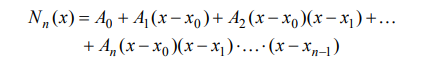

Требования совпадения значений полинома с заданными значениями функции в узловых точках приводит к системе
линейных уравнений с треугольной матрицей для неизвестных коэффициентов:
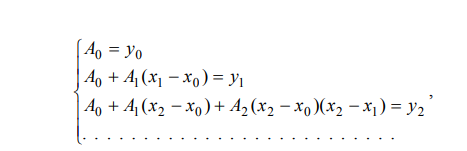

In [146]:
def coefficients(x,y):
    m = len(x)

    x = np.copy(x)
    a = np.copy(y)
    for k in range(1,m):
        a[k:m] = (a[k:m] - a[k-1])/(x[k:m] - x[k-1])

    return a

def polynom(x_data, y_data, x):
    a = coefficients(x_data, y_data)
    n = len(x_data) - 1 
    p = a[n]
    for k in range(1,n+1):
        p = a[n-k] + (x -x_data[n-k])*p
    return p
print('Coeff: ',coefficients(x,y))
print('Polynom [(P(x0),P(x1),P(x2))]:',polynom(x, y, x))

Coeff:  [-1.  -1.5  2.5]
Polynom [(P(x0),P(x1),P(x2))]: [-1. -4.  2.]


Видно, что полиномы, составленные из полученных коэффициентов и значений по Х, и для полинома в канонической форме и для полинома Лагранжа и полинома Ньютона, дают результат (Polynom) значения Y. Значит они все равны.

### Задание 2

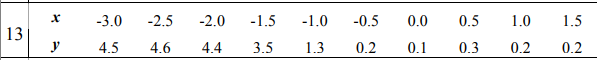

In [46]:
x = np.array([-3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5],dtype=float)

y = np.array([4.5, 4.6, 4.4, 3.5, 1.3, 0.2, 0.1, 0.3, 0.2, 0.2],dtype=float)

В качестве глобальной интерполяции была использована интерполяция полиномом Лагранжа

<IPython.core.display.Javascript object>


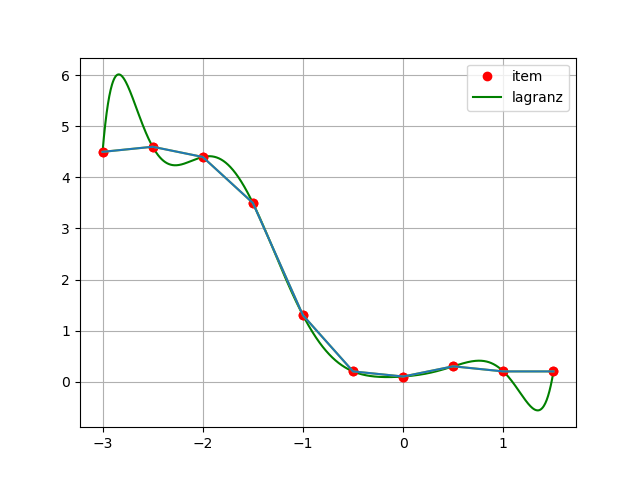

In [47]:
%matplotlib notebook

xnew=np.linspace(np.min(x),np.max(x),1000)
ynew=[lagranz(x,y,i) for i in xnew]
plt.plot(x,y,'ro',xnew,ynew,'g')
plt.plot(x,y,'ro',x,y,'y')
plt.plot(x,y)
plt.legend(['item', 'lagranz'], loc='best')
plt.grid()
plt.show()

### Интерполяция кубическими сплайнами

Существенным недостатком кусочной интерполяции является то, что в точках стыка разных интерполяционных полиномов оказывается разрывной их первая производная (функция имеет
излом). Этот недостаток устраняется при использовании особого вида многоинтервальной интерполяции – интерполяции сплайнами (англ. spline –
рейка, линейка).

Функция s(x) на интервале [a, b] называется сплайном степени k на сетке с горизонтальными узлами,  если выполняются следующие св-ва:







   1.На интервалах 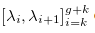 функция s(x) является полиномом k-й степени.

   2.n-ая производная функции s(x) непрерывна в любой точке [a, b] для любого n = 1,…, k-1.




Для построения сплайна нужно для начала задать сетку из горизонтальных узлов. Расположим их таким образом, чтобы внутри интервала (a, b) стояло g узлов, а по краям — k+1:  и .

Каждый сплайн в точке  может быть представлен в базисной форме:
    



где  — B-сплайн k+1-го порядка:

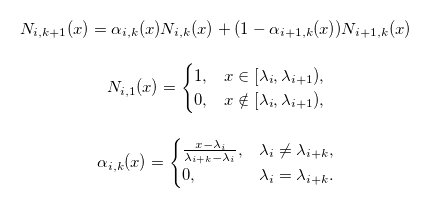

<IPython.core.display.Javascript object>


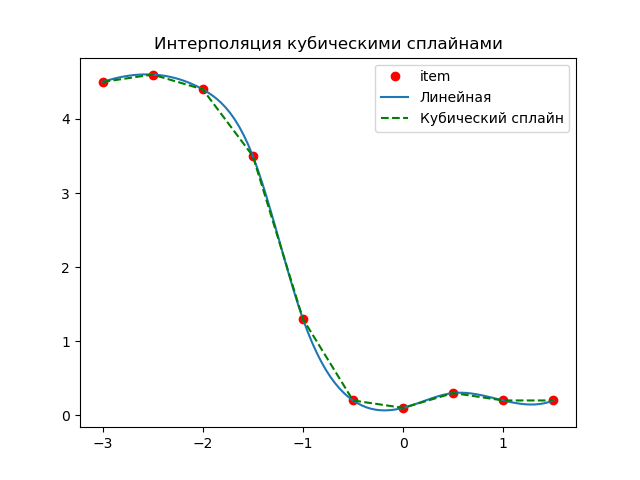

In [119]:
%matplotlib notebook
tck = interpolate.splrep(x, y, s=0)
xnew=np.linspace(np.min(x),np.max(x),100)
ynew = interpolate.splev(xnew, tck, der=0)#der - производная сплайн-функции

plt.figure()
plt.plot(x, y, 'ro', xnew, ynew, x, y, '--g')
plt.legend(['item','Линейная', 'Кубический сплайн'])
plt.title('Интерполяция кубическими сплайнами')
plt.show()

### Дифференцирование исходной функции

<IPython.core.display.Javascript object>


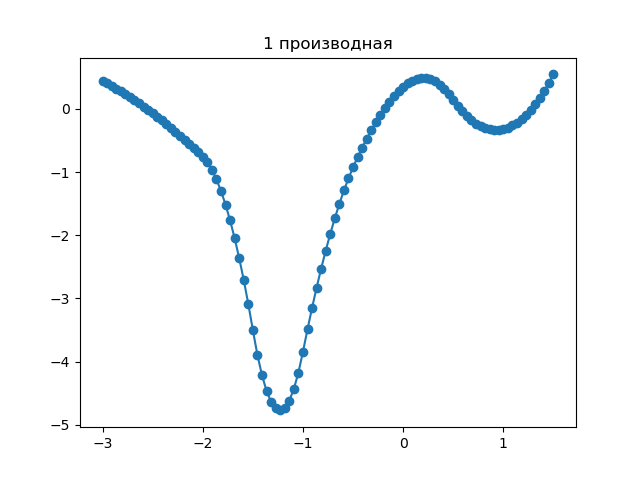

In [120]:
%matplotlib notebook
tck = interpolate.splrep(x, y, s=0)
xnew=np.linspace(np.min(x),np.max(x),100)
ynew = interpolate.splev(xnew, tck, der=1)

plt.figure()
plt.plot( xnew, ynew,'o-' )
plt.title('1 производная')
plt.show()

### 2 производная

<IPython.core.display.Javascript object>


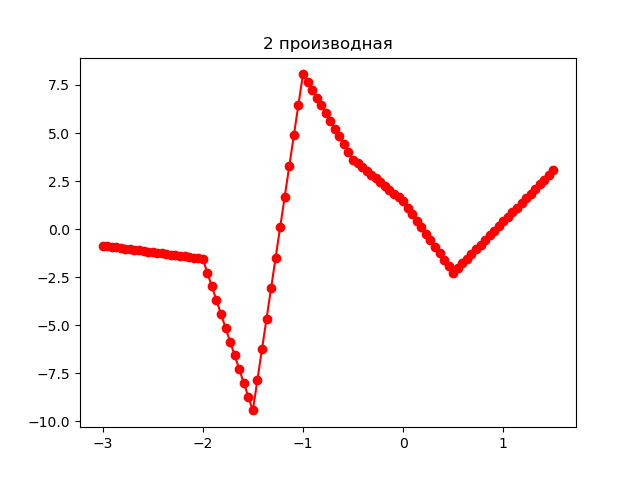

In [125]:
%matplotlib notebook
tck = interpolate.splrep(x, y, s=0)
xnew=np.linspace(np.min(x),np.max(x),100)
ynew = interpolate.splev(xnew, tck, der=2)

plt.figure()
plt.plot( xnew, ynew,'ro-')
plt.title('2 производная')
plt.show()

### 3 производная

<IPython.core.display.Javascript object>


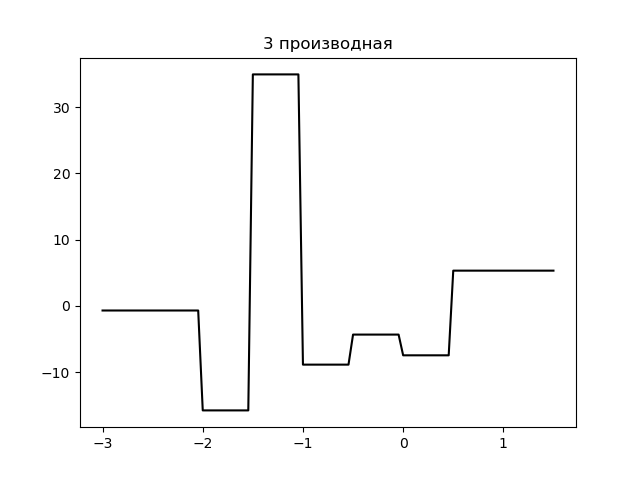

In [140]:
%matplotlib notebook
tck = interpolate.splrep(x, y, s=0)
xnew=np.linspace(np.min(x),np.max(x),100)
ynew = interpolate.splev(xnew, tck, der=3)

plt.figure()
plt.plot( xnew, ynew,'k-')
plt.title('3 производная')
plt.show()